In [43]:

%matplotlib inline
import torch 
import torchvision
from IPython import display
from d2l import torch as d2l
from torch.utils import data
from torchvision import transforms

In [44]:
def get_dataloader_workers():
    return 4

def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, 
                            shuffle=True,num_workers=get_dataloader_workers()),
            # we didnot shuffle on test_iter, 
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

In [45]:
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

# the image is 28x28 = 784
num_input=784
num_output = 10


w = torch.normal(0,0.01, (num_input, num_output), requires_grad=True)
b = torch.zeros(num_output, requires_grad=True)

In [94]:
# X.shape = torch.Size([256, 1, 28, 28])
# y.shape = torch.Size([256])
for X, y in train_iter:
    print(X.shape)
    print(y)
    break

torch.Size([256, 1, 28, 28])
tensor([3, 7, 8, 3, 2, 6, 9, 9, 0, 0, 3, 1, 2, 0, 2, 8, 1, 6, 8, 9, 6, 7, 2, 5,
        2, 6, 2, 7, 1, 9, 7, 1, 9, 0, 3, 4, 0, 6, 2, 3, 9, 4, 3, 0, 2, 4, 9, 4,
        9, 1, 4, 8, 8, 2, 3, 6, 5, 6, 7, 2, 6, 3, 1, 0, 4, 3, 5, 0, 9, 4, 1, 8,
        8, 6, 2, 5, 1, 7, 1, 7, 6, 9, 7, 9, 6, 2, 1, 4, 5, 5, 8, 1, 9, 5, 8, 6,
        6, 6, 7, 8, 6, 1, 9, 2, 9, 3, 8, 4, 8, 1, 3, 4, 0, 8, 8, 4, 8, 0, 5, 4,
        6, 5, 7, 2, 7, 4, 3, 1, 1, 2, 7, 0, 9, 7, 5, 9, 5, 0, 7, 6, 0, 6, 4, 4,
        7, 5, 2, 4, 4, 7, 0, 6, 8, 5, 9, 3, 4, 7, 3, 8, 4, 8, 4, 7, 7, 8, 3, 6,
        0, 5, 4, 7, 2, 0, 5, 5, 2, 9, 7, 7, 2, 3, 5, 6, 4, 2, 5, 6, 3, 5, 0, 5,
        1, 6, 5, 1, 5, 6, 3, 1, 9, 0, 8, 2, 1, 3, 3, 6, 8, 5, 6, 7, 4, 5, 8, 6,
        1, 8, 1, 1, 7, 9, 3, 6, 7, 5, 3, 0, 4, 4, 7, 6, 4, 2, 9, 0, 4, 6, 7, 1,
        8, 5, 6, 2, 6, 3, 6, 8, 7, 4, 3, 4, 9, 7, 0, 0])


In [90]:
# see the data
for X, y in train_iter:
    print(y)
    break

tensor([8, 6, 6, 8, 9, 3, 4, 9, 3, 4, 7, 4, 7, 2, 1, 2, 5, 2, 8, 9, 4, 8, 1, 6,
        8, 7, 0, 9, 5, 7, 6, 3, 2, 0, 4, 2, 3, 2, 3, 8, 1, 0, 6, 3, 8, 2, 6, 2,
        9, 1, 7, 6, 3, 1, 4, 5, 7, 8, 0, 7, 5, 0, 6, 5, 1, 7, 7, 1, 1, 5, 8, 2,
        2, 3, 2, 8, 0, 0, 9, 3, 0, 3, 2, 5, 7, 9, 0, 3, 4, 8, 6, 5, 4, 7, 6, 8,
        7, 6, 6, 7, 9, 3, 9, 0, 5, 6, 7, 1, 6, 3, 1, 3, 8, 9, 0, 5, 7, 6, 2, 2,
        5, 0, 8, 5, 2, 8, 4, 0, 9, 1, 0, 8, 7, 9, 1, 2, 5, 7, 3, 2, 1, 0, 7, 8,
        2, 5, 9, 2, 5, 9, 5, 7, 0, 0, 8, 2, 7, 2, 2, 8, 3, 2, 0, 5, 4, 3, 9, 5,
        2, 2, 7, 6, 1, 8, 5, 9, 5, 0, 4, 4, 3, 2, 3, 4, 7, 9, 3, 6, 0, 4, 3, 8,
        3, 4, 6, 3, 5, 4, 8, 2, 9, 0, 7, 6, 1, 1, 0, 9, 2, 3, 9, 7, 3, 5, 7, 7,
        4, 9, 4, 9, 9, 5, 8, 0, 6, 0, 7, 4, 7, 5, 1, 3, 9, 9, 1, 7, 8, 5, 7, 5,
        7, 6, 3, 6, 0, 0, 8, 0, 9, 7, 6, 7, 8, 9, 3, 8])


In [46]:
def softmax(X):
    X_exp =torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp/partition 

In [56]:
## define model,
# w is [784, 10], X is data from fashion_mnist-->[] , w.shape[0] = 784
#  X.shape = (batch_size, 1, 28, 28), 
#  -1 will auto inferred to batch_size, here will be 256, X.shape->256 × 1 × 28 × 28 = 50176*4 / 784 = 256
#  it will flat input X to shape multiplable with w
#  so overall the matrix will be like [256, 784] @ [784,10] = [256, 10]

def net(X):
    return softmax(X.reshape((-1, w.shape[0]))@w+ b)

In [57]:

# label, 
y = torch.tensor([0,2])
# predictions, we have 3 cats and 2 predictions results for two requests
y_hat = torch.tensor([[0.1, 0.3,0.6], [0.3,0.2, 0.5]])


# [[0,1], [0,2]]--> [[0,0],[1,2]], 1st element is [0,1], 2nd element is [1,2]
y_hat[[0,1], y]

tensor([0.1000, 0.5000])

In [49]:
y_hat[[0,1], 1]

tensor([0.3000, 0.2000])

In [50]:

# cross_entropy is from shannon's theory, entropy = sum(-p(i) * log(p(i)))
# y_hat.shape=[256,10], y.shape=[256,1], 
# the function will pick the real probabilty from y_hat with index in y(label), then use torch.log to calculate cross entropy 
# y_hat means predictions（0.5）, the return value of softmax, y means real value（0-9）, like label
#  range(len(y_hat)) means how many items(rows), y is label
# so it will return y_hat predictions for each class
# range(len(y_hat)) -> range(row_size_of_y_hat)--> range(256)-> [0,255]
# y_hat[[0,2], [0,2]]--> two elements from 2 rows in y_hat, [0,0] and [1,2]

def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])


#  this is just calc only 2 requests loss function
cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [61]:
y_hat[range(len(y_hat))]

tensor([[0.1000, 0.3000, 0.6000],
        [0.3000, 0.2000, 0.5000]])

In [54]:
y_hat[range(len(y_hat)), y]

tensor([0.1000, 0.5000])

In [74]:
# y_hat.shape is [256, 10], y is [8,2,1,2,4,5...] length = 256
def accuracy(y_hat, y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        #  torch.tensor([[0.1, 0.3,0.6], [0.3,0.2, 0.5]])
        # y_hat.argmax(axis=1) → [2, 2]， real y = [0,2]
        y_hat = y_hat.argmax(axis =1)
    #  reset y_hat data type to be same as y, and compare each element whether they are the same or not
    cmp = y_hat.type(y.dtype) == y
    #  this will return 1
    return float(cmp.type(y.dtype).sum())



accuracy(y_hat, y)/len(y), accuracy(y_hat, y)

(0.5, 1.0)

In [119]:

#  data[0] = 存储正确预测的数量 
#  data[1] = 预测的总数量
class Accumulator:
    def __init__(self, n):
        
        # [0,0] * n --> repeat [0,0] n times, for example
        # [0,0] * 2 -> [0,0,0,0]
        self.data = [0,0] * n
    
    def add(self, *args):
        #  will return [存储正确预测的数量, 预测的总数量]
        # 如果 self.data = [0,0,0,0]，args = [1,0],[256]，那么：
        # zip(self.data, args) ➜ [(1.0, 4), (2.0, 5), (3.0, 6)]
        ## print('agrs: ' + str(args)) --> agrs: (212.0, 256)
        self.data =[a+float(b) for a, b in zip(self.data, args)]
    
    def reset(self):
        self.data = [0.0]* len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]
    

In [111]:
for a, b in zip([0,0,0], [1,2]):
    print(a, b)

0 1
0 2


In [120]:

def evaluate_accuracy(net, data_iter):
    # here we just call manual softmax one, not pytorch one
    if isinstance(net, torch.nn.Module):
        net.eval()
    metric = Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            # it will return add([1.0, 256])
            # accuracy(net(X), y)--> return sum of values which same as label
            #  y.numel() ---> count of elements in y, return 256
            metric.add(accuracy(net(X), y), y.numel())
    print(metric.data)
    return metric[0]/metric[1]

In [121]:
evaluate_accuracy(net, test_iter)

agrs: (212.0, 256)
agrs: (216.0, 256)
agrs: (203.0, 256)
agrs: (204.0, 256)
agrs: (209.0, 256)
agrs: (213.0, 256)
agrs: (217.0, 256)
agrs: (207.0, 256)
agrs: (211.0, 256)
agrs: (207.0, 256)
agrs: (214.0, 256)
agrs: (198.0, 256)
agrs: (199.0, 256)
agrs: (200.0, 256)
agrs: (215.0, 256)
agrs: (204.0, 256)
agrs: (201.0, 256)
agrs: (226.0, 256)
agrs: (203.0, 256)
agrs: (191.0, 256)
agrs: (209.0, 256)
agrs: (201.0, 256)
agrs: (203.0, 256)
agrs: (203.0, 256)
agrs: (210.0, 256)
agrs: (197.0, 256)
agrs: (200.0, 256)
agrs: (205.0, 256)
agrs: (209.0, 256)
agrs: (215.0, 256)
agrs: (210.0, 256)
agrs: (191.0, 256)
agrs: (206.0, 256)
agrs: (209.0, 256)
agrs: (194.0, 256)
agrs: (203.0, 256)
agrs: (207.0, 256)
agrs: (202.0, 256)
agrs: (215.0, 256)
agrs: (13.0, 16)
[8052.0, 10000.0]


0.8052

In [75]:
#  train code
def train_epoch_ch3(net, train_iter, loss, updater):
    if isinstance(net, torch.nn.Module):
        net.train()
    # [0,0] * 3  
    metric = Accumulator(3)
    # X is the training data [], y is the label [8,3,2]
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    #  [train loss, train accuracy]
    return metric[0]/metric[2], metric[1]/metric[2]

In [77]:
#draw the graph
class Animator:
    def __init__(self, xlabel=None, ylabel=None, legend =None, xlim=None, 
                 ylim = None, xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-', 'r:'), 
                 nrows =1, ncols=1, figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts
    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)
    

In [78]:

#  loss is cross_entropy
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater): #@save
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
    legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [81]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([w, b], lr, batch_size)

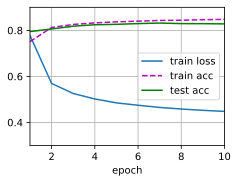

In [82]:
num_epochs = 12
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)